# Homework #4 (Due 10/9/2019, 11:59pm)
## Hierarchical Models and the Theory of Variational Inference

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2019**

**Name: Dimitris Vamvourellis**

**Students collaborators:**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pymc3 import model_to_graphviz, Model
import pymc3 as pm
%matplotlib inline

# Problem Description: Understanding EM and Variational Inference

In this problem, we will draw concrete connections between EM and variational inference by applying both methods to a certain class of latent variable models. You'll need to refer to relevant lecture notes on the derivations of EM and the derivation of the variational inference objective. This is an essay question that requires you to engage with complex derivations at a productive but still high level. No implementation is required.

#### Non-Bayesian Latent Variable Model
Recall the class of latent variable models we studied in lecture:
<img src="fig/graphical_model.jpg" style="height:150px;">

#### Bayesian Latent Variable Model
A Bayesian version of the same class of models involve adding priors for the model parameters:
<img src="fig/bayesian_model.jpg" style="height:150px;">

1. **(Comparing ELBOs)** For the above type of Bayesian latent variable model, write down the ELBO for variational inference with a mean field variational family. Compare the variational inference ELBO for the Bayesian model to the expectation maximization ELBO for the non-Bayesian model. What are the differences and similarities between these two ELBOs?

  In both EM and variational inference we optimize the ELBO. Compare the update steps in EM to the update steps in Coordinate Ascent Variational Inference, draw a concrete analogy between them.
  
  ***Hint:*** To make both ELBO's comparable, make sure that both are in terms of $z, y, \theta, \phi$.
  <br><br>
  
2. **(Comparing ELBOs and KL-divergences)** Recall that the original objective of variational inference is to minimize a KL-divergence, we rewrote the objective to be that of maximizing the ELBO. Why is directly minimizing the KL-divergence in the original objective difficult (be specific about wherein the difficulty lies)? 

  In the derivation of the E-step of EM, we reframed an maximization of the ELBO problem as a minimization of a KL-divergence problem. In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximize (use the instantiation of the E-step for Gaussian Mixture Models in Lecture 7 to help support your answer)? 

  In the notes for Lecture 8, we introduce a way to maximize the variational inference ELBO -- through coordinate ascent. In the derivation of the updates for coordinate ascent, there is a place where we reframed an maximization of the ELBO problem as an equivalent minimization of a KL-divergence problem. Write down the exact form of this equivalence (the two expressions are separated in the derivation by a bunch of lines, you'll need to identify both parts that you need). In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximization (use the instantiation of the update for Gaussian Mixture Models in Lecture 8 to help support your answer)?

  Based on this analysis, can you draw some general conclusions about when we'd prefer to minimize the KL-divergence versus when we'd prefer to maximize the ELBO?<br><br>

3. **(The Mean Field Assumption and Coordinate Ascent)**  Describe exactly when and how the mean field assumption is used in the derivation of the coordinate ascent updates. <br><br>

4. **(Generalizability of CAVI)** Summarize what kind of derivations/math is needed in order instantiate Coordinate Ascent Variational Inference (CAVI) for a given new model (look at what we did for Gaussian Mixture Models in Lecture 8 and predict what you'd need to do for a new model). Based on this, discuss the potential draw backs of using CAVI for Bayesian inference in general. Do these draw backs mean that variational inference is not a practical method of inference? What problem(s) need to be solved in order to make variational inference easy to implement for any given Bayesian model?

**ANSWERS**

**1.** In the Bayesian Latent Variable model the posterior distribution that we want to approximate is given by

$$p(\theta, \phi, Z_1, \ldots, Z_N|Y_1, \ldots, Y_N, a, b) = \frac{p(\theta | a)p(\phi|b)\prod_{n}p(Y_n|Z_n, \phi)p(Z_n|\theta)}{\prod_{n} p(Y_n)}.$$

Hence, the joint density of latent and observed variables is given by

$$p(\theta, \phi, Z_1, \ldots, Z_N, Y_1, \ldots, Y_N, a, b) = p(\theta | a)p(\phi|b)\prod_{n}p(Y_n|Z_n, \phi)p(Z_n|\theta).$$

Using the mean field variational family, we will try to approximate the above posterior distribution of latent variables by a distribution $q$ such that

$$q(\theta, \phi, Z_1, \ldots, Z_N | \lambda) = q(\theta|\lambda)q(\phi|\lambda)\prod_{n}q(Z_n|\lambda), $$

where $\lambda$ is a vector containing all the hyperparameters for each variational factor. Our objective is to find the optimal parameters $\lambda$ for each variational factor so as to maximize the $ELBO(\lambda)$ which is given by

$$ELBO(\lambda) = \mathbb{E}_{\theta, \phi, Z_1, \ldots, Z_N \sim q(\theta, \phi, Z_1, \ldots, Z_N | \lambda)} [\frac{\log{p(\theta, \phi, Z_1, \ldots, Z_N, Y_1, \ldots, Y_N)}}{\log{q(\theta, \phi, Z_1, \ldots, Z_N|\lambda)}}]$$

Let $\psi = (\theta, \phi, Z_1, \ldots, Z_N)$ be the vector holding all the latent variables. For each of the latent variables $\psi_i$, the update of the corresponsing parameters $\lambda^{\text{new}}_{i}$ of each variational factor satisfies

$$q(\psi_i | \lambda^{\text{new}}_i) \propto \exp\left\{ \mathbb{E}_{\psi_{-i} \sim q(\psi_{-i} | \lambda^{\text{new}}_{1}, \ldots, \lambda^{\text{new}}_{i-1}, \lambda^{\text{old}}_{i+1}, \ldots, \lambda^{\text{old}}_{I})}\left[\log p(Y_1, \ldots, Y_N, \psi)\right]\right\},$$


For the non-Bayesian model, the $ELBO$ is given by

$$ELBO(\theta,\phi, q) = \sum_{n=1}^N\mathbb{E}_{Z_n\sim q(Z)} \left[  \log\,\left(\frac{p(y_n, Z_n|\theta, \phi)}{q(Z_n)}\right)\right]$$

In the EM algorithm, the updates are given by:

E-step:
$$q_{new}(Z_n) = p(Z_n|Y_n, \theta_{\text{old}}, \phi_{\text{old}})$$

M-step:
$$\theta_{new}, \phi_{new} =  \underset{\theta, \phi}{\mathrm{argmax}}\; \sum_{n=1}^N\mathbb{E}_{Z_n\sim p(Z_n|Y_n, \theta_{\text{old}}, \phi_{\text{old}})}\left[\log \left( p(y_n, Z_n | \theta, \phi\right) \right].$$

Both $ELBOs$ refer to an expectation of a $log$ with respect to a distribution $q$ over the latent variables. For both $ELBOs$, the numerator of the log is the joint density of observed and latent variables while the denominator is the distribution $q$ over latent variables.
In the EM $ELBO$, $\theta$ and $\phi$ are treated as constants. Hence, the numerator in the log term is the complete data log likelihood given these two constants. In the VI $ELBO$, $\theta$ and $\phi$ are latent variables themselves, hence the numerator in the log term is the joint density of observed and unobserved variables $Z, \theta, \phi$. Similarly, the VI $ELBO$ includes $\theta$ and $\phi$ in the denominator of the log whereas the EM ELBO treats $Z_n$ as the only latent variable, hence it only includes this in the denominator.

In both cases, the updates are proportional to an expectation of the log joint density of observed and unobserved variables. In both cases, the parameters are maximized one at a time by keeping constant all the other variables at their current expected values.

**2.** a. To minimize the KL-divergence, we would need to compute

$$ \underset{\lambda}{\max} -\mathbb{E}_{\psi \sim q(\psi|\lambda)}\left[\log\left(\frac{q(\psi | \lambda)}{p(\psi|Y_1, \ldots, Y_N))} \right)\right] .$$

However, the denominator of the log term is the posterior over latent variables that we could not compute in first place and we are trying to approximate with variational inference. Hence, we cannot directly minimize KL-divergence since we cannot calculate the denominator of the above log term.


b. To maximize the EM $ELBO$ with respect to $q$, we would need to calculate the gradient of the $ELBO$ with respect to $q$ which is hard given that the expectation taken in $ELBO$ is also taken with respect to $q$ and in turn gradients cannot be pushed in the expectation. Instead, the minimum of the KL-divergence between two distributions is known. Hence, by formulating the problem as the minimization of KL-Divergence we don't have to compute any gradients to find the minimum.


c. The equivalence is given by 

$$ \underset{\lambda_i}{\max} \mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}\left[\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(\frac{p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i})}{q(\psi_{i}|\lambda_{i})} \right)\right]\right] = \underset{\lambda_i}{\min}D_{\text{KL}} \left[ q(\psi_{i}|\lambda_{i})\| \mathcal{Z}\exp\left\{\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i}) \right)\right]\right\}\right]$$

Again, we cannot push the gradient with respect to $\lambda_i$ in the outer expectation, since the outer expectation is taken with respect to a function of $\lambda_i$. Hence the evaluation of the gradient is not trivial. Instead we turn this problem to the minimization of a KL-divergence for which the minimum is known.

Generally, we prefer to minimize the KL-divergence when the gradient computation is difficult as in cases where the the gradient is taken with respect to the same variables as the variables with respect to which the expecation is computed.

Instead, we prefer to maximize the $ELBO$ over minimizing the KL-divergence if we cannot evaluate the posterior included in the KL-divergence but we can evaluate the joint over latent and observed variables.

**3.** To maximize the $ELBO$ and thus derive the optimal coordinate ascent updates, we are using the mean-field assumption to break up the expectation 

$$\underbrace{\mathbb{E}_{\psi \sim q(\psi|\lambda)}\left[\log\left(\frac{p(\psi, Y_1, \ldots, Y_N))}{q(\psi | \lambda)} \right)\right]}_{ELBO(\lambda)}$$

into an iterated expectation 

$$\mathbb{E}_{\psi_i \sim q(\psi_i|\lambda_i)}\left[\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda_{-i})} \left[\log \left(\frac{p(Y_1, \ldots, Y_N, \psi_i | \psi_{-i})p(\psi_{-i})}{q(\psi_{i}|\lambda_{i})q(\psi_{-i}|\lambda_{-i})} \right)\right]\right]$$


In other words, given that the joint $q(\psi)$ factorizes completely over each dimension of $\psi$ (i.e. each dimension is independent of the other), the expectation over the joint can be split in the expectation over the $i_{th}$ dimension $\psi_i$  and the expectation over the rest of the dimensions $\psi_{-i}$. 

**4.** To instantiate CAVI for a given new model, we need to write down our approximate variational posterior using the mean field assumption

$$q(z) = \prod_{m}q_j(z_j).$$

Then, for each variational factor $q_j(z_j)$, we need to derive the update

$$q_j(z_j) \propto \exp{E_{-j}[\log p(z_j, z_{-j}, Y)}$$

This involves deriving $\log p(z_j, z_{-j}, Y)$ and then calculating its expectation with respect to $z_{-j}$, for each $z_j$.

As it is made obvious, calculating the updates for a high number of latent variables can be a very manual and expensive task. Also, another drawback of CAVI is the mean field assumption. Assuming that each dimension of the approximate posterior is independent of the other can be a rather unrealistic assumption, especially if some of the latent variables depend on each other. In such cases, we are trying to find the best distribution out of a family of distributions which are not similar to the original posterior. Hence, the approximate posterior would not be representative of the original posterior providing misleading uncertainty estimates.

Also, we were able to derive the updates in the case of Bayesian GMM model because the expectation of the joint density in the update $q(\psi_i | \lambda^{\text{new}}_i) \propto \exp\left\{ \mathbb{E}_{\psi_{-i} \sim q(\psi_{-i} | \lambda^{\text{new}}_{1}, \ldots, \lambda^{\text{new}}_{i-1}, \lambda^{\text{old}}_{i+1}, \ldots, \lambda^{\text{old}}_{I})}\left[\log p(Y_1, \ldots, Y_N, \psi)\right]\right\}$ evaluated to a known distribution which we could identify and read its parameters. However, when we perform Bayesian inference, in most of the cases the joint density will not have closed form and might not factor nicely to a known distribution. Hence it would be impossible to derive the updates making CAVI an impractical method. Thus, this indicates another drawback of CAVI concerning its generalizability for any given Bayesian model.

Essentially, to make variational inference easy to implement for any Bayesian model, we need to find an easy way to compute the gradient of the ELBO with respect to the parameters of the variational approximate distribution. The gradient is taken with respect to the parameter $\lambda$. But the expectation in the ELBO is taken with respect to $q$ which is also a function of $\lambda$ an in turn we cannot push the gradient in the expectation. Thus, maximizing the ELBO is a non-trivial problem.

# Problem Description: Modeling Kidney Cancer Data
In this problem, we will continue to work with the US Kidney Cancer Data set, `kcancer.csv`. This is a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

**In this homework, we focus on comparing different types of models for this data set.**


## Part I: Empirical Bayes
Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-county and $\theta_j$ be the underlying kidney cancer rate for that county. The following is a Bayesian model for our data:
\begin{aligned}
y_j | \theta_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

1. **(Visualize the raw cancer rates)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. What can you say about the counties with the highest and lowest raw cancer rates.<br><br>

2. **(Empirical Bayes)** Using Empirical Bayes and moment matching, choose values for the hyperparameters $\alpha, \beta$ based on your data. Use these values of $\alpha$ and $\beta$ to obtain posterior distributions for each county.

***Hint:*** You'll first need to derive the fact that the ***evidence*** for a Poisson-Gamma model has a Negative Binomial distribution.<br><br>

3. **(Justification for Empirical Bayes)** Explain why, in this case, it is not a good idea to pick arbitrary values for $\alpha$ and $\beta$ for the gamma prior and proceed with Bayesian inference. Use properties of the cancer dataset to back up your explanation (i.e. it's not *always* problemmatic to choose hyperparameters of the prior arbitrarily, why is it problemmatic for this dataset).<br><br>

4. **(Posterior Means)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot again, scatter plot the posterior mean cancer rate estimates vs the county population size, highlight these means in green. 

  Using the scatter plot, explain why using the posterior means (from our model) to estimate cancer rates is preferable to studying the raw rates themselves.

**ANSWERS**

**1.**

In [2]:
kcancer_df = pd.read_csv('kcancer.csv')
kcancer_df.head()

,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


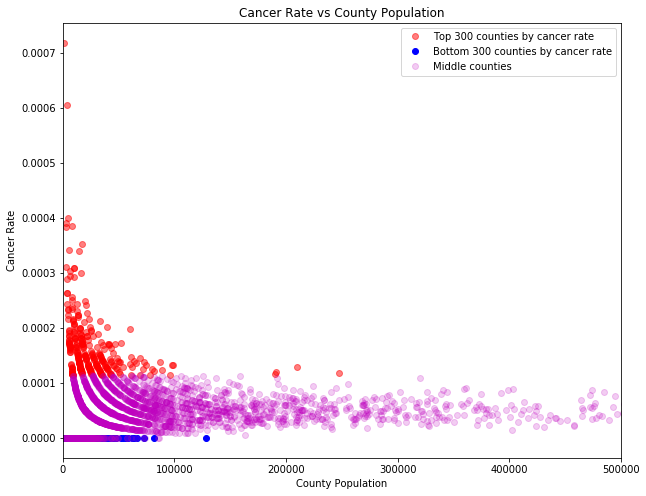

In [3]:
kcancer_df_sorted = kcancer_df.sort_values(by=['pct_mortality'], ascending=False).reset_index()

plt.figure(figsize=(10,8))
plt.plot(kcancer_df_sorted.loc[:299, 'pop'], kcancer_df_sorted.loc[:299, 'pct_mortality'], 'ro', alpha=0.5, label='Top 300 counties by cancer rate')
plt.plot(kcancer_df_sorted.tail(300).loc[:, 'pop'], kcancer_df_sorted.tail(300).loc[:, 'pct_mortality'], 'bo', alpha=1, label='Bottom 300 counties by cancer rate')
plt.plot(kcancer_df_sorted.loc[300:2812, 'pop'], kcancer_df_sorted.loc[300:2812, 'pct_mortality'], 'mo', alpha=0.2, label='Middle counties')
plt.title("Cancer Rate vs County Population")
plt.xlabel("County Population")
plt.ylabel("Cancer Rate")
plt.xlim(0, 0.05*1e7)
plt.legend()



Producing the same graph only for counties with very low population, makes the pattern more visible.

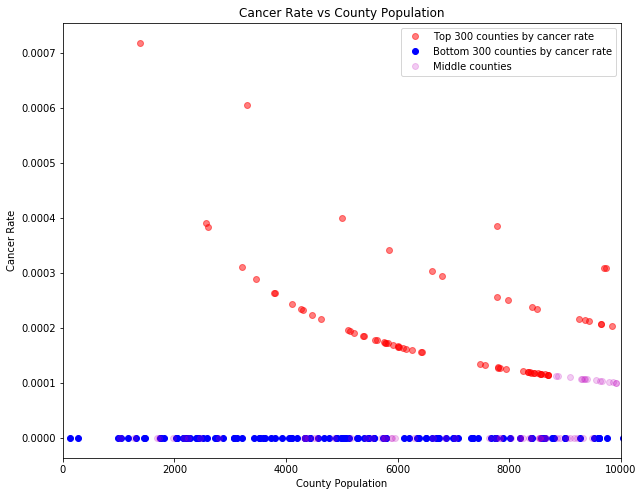

In [4]:
plt.figure(figsize=(10,8))
plt.plot(kcancer_df_sorted.loc[:299, 'pop'], kcancer_df_sorted.loc[:299, 'pct_mortality'], 'ro', alpha=0.5, label='Top 300 counties by cancer rate')
plt.plot(kcancer_df_sorted.tail(300).loc[:, 'pop'], kcancer_df_sorted.tail(300).loc[:, 'pct_mortality'], 'bo', alpha=1, label='Bottom 300 counties by cancer rate')
plt.plot(kcancer_df_sorted.loc[300:2812, 'pop'], kcancer_df_sorted.loc[300:2812, 'pct_mortality'], 'mo', alpha=0.2, label='Middle counties')
plt.title("Cancer Rate vs County Population")
plt.xlabel("County Population")
plt.ylabel("Cancer Rate")
#plot the counties with population up to 10000
plt.xlim(0, 0.001*1e7)
plt.legend()

As we can see from the above plots, the highest and lowest cancer rates are observed for low population counties. For the lowest cancer rates,  when the county population is very low, it is more likely that no incidents of kindey cancer might have been recorded, hence the raw cancer rate in such county will be 0. Similarly, if the county population is low and some indidents have been recorded, the cancer rate (calculated as the indicents divided by the population) would be overstated compared to a very large county. For this reason, both extremes of cancer rates are observed for counties with very low populations.

**2.** The idea of Empirical Bayes is to choose the hyperparameters $\alpha,\beta$ such that the expected likelihood of the data over $\theta_J \sim Gamma(\alpha, \beta)$, is maximized:

\begin{aligned}
p(Y_1, \ldots, Y_N| \alpha, \beta) = \prod_{j=1}^N \int_0^ \infty Poisson(Y_j|\theta_j) Gamma(\theta_j|\alpha, \beta)d\theta_j = \\ \prod_{j=1}^N \int_0^ \infty \frac{e^{-5n_j\theta_j} (5n_j\theta_j)^{y_j}}{y_j!} \frac{\beta^{\alpha}}{\Gamma(\alpha)} \theta_j^{\alpha-1} e^{-\beta \theta_j}  d\theta_j = \\
\prod_{j=1}^N \frac{\beta^{\alpha}(5n_j)^{y_j}}{\Gamma(\alpha)y_j!} \int_0^ \infty \theta_j^{y_j + \alpha - 1} *  e^{-(5n_j+\beta)\theta_j} d\theta_j = \\
\prod_{j=1}^N \frac{\beta^{\alpha}(5n_j)^{y_j}}{\Gamma(\alpha)y_j!} \frac{\Gamma(\alpha+y_j)}{(5 n_j  + \beta)^{\alpha + y_j}} \int_0^ \infty \frac{(5 n_j  + \beta)^{\alpha + y_j}}{\Gamma(\alpha+y_j)}\theta_j^{y_j + \alpha - 1} *  e^{-(5n_j+\beta)\theta_j} d\theta_j
\end{aligned}

The integrand is the pdf of the $Gamma(\theta_j; \alpha + y_j, 5 n_j  + \beta)$, hence the integral is equal to 1 over the support of the Gamma distribution. Therefore, we obtain,  

$$p(Y_1, \ldots, Y_N| \alpha, \beta)  = \prod_{j=1}^N \frac{\beta^{\alpha}(5n_j)^{y_j}}{\Gamma(\alpha)y_j!} \frac{\Gamma(\alpha+y_j)}{(5 n_j  + \beta)^{\alpha + y_j}} = $$

$$ = \prod_{j=1}^N \frac{\beta^{\alpha}(5n_j)^{y_j}}{\Gamma(\alpha)y_j!} \frac{\Gamma(\alpha+y_j)}{(5 n_j  + \beta)^{\alpha + y_j}} = $$

$$ = \prod_{j=1}^N {a+y_j-1 \choose y_j} \left(\frac{5n_j}{5n_j+\beta}\right)^{y_j} \left(\frac{\beta}{5n_j+\beta}\right)^\alpha$$ 



The term in the product is the Negative Binomial pmf with number of failures $r = \alpha$ and probability of success $p = \frac{5n_j}{5n_j+\beta}$. Since each marginal $p(Y_j| \alpha, \beta)$ is a Negative-Binomial distribution, we know its first two moments:

$$ \mathbb{E}\left[Y_j\right] = \frac{rp}{1-p} = \frac{\alpha 5n_j}{\beta}$$


$$\text{Var}\left[Y_j\right] = \frac{rp}{(1-p)^2} = \frac{5\alpha n_j (5n_j+\beta)}{\beta^2}$$

Now assuming that $Y_n's$ are iid data from the same negative binomial, we can use the empirical moments and then solve for $\alpha, \beta$:

\begin{aligned}
\widehat{\mathbb{E}}\left[\frac{Y_j}{n_j}\right] &=  \frac{5\alpha}{\beta}\\
\widehat{\text{Var}}\left[\frac{Y_j}{n_j}\right] &= \frac{5\alpha (5\overline{n_j}+\beta)}{\overline{n_j}\beta^2},
\end{aligned}

where $\overline{n_j}$ is the sample mean of the county populations. 

First we will find the empirical moments below:

In [5]:
mean = np.mean(kcancer_df['dc']*1.0/kcancer_df['pop'])
variance = np.std(kcancer_df['dc']*1.0/kcancer_df['pop'])**2
pop_mean = np.mean(kcancer_df['pop'])

print("mean = ", mean)
print("var = ", variance)
print("mean county population =", pop_mean)

mean =  5.7865523541086144e-05
var =  2.5275230108122053e-09
mean county population = 160512.41021522647


By substituting the calculated empirical values for sample mean raw rate, sample variance of the raw rate and sample mean population in the above system of equations, we can solve for $\alpha$ and $\beta$ and get the following results:

$$\alpha = 1.54517$$
$$\beta = 133514$$

We proceed by writing the model in `pymc3` and obtaining samples from the posterior of each county.

In [6]:
#observations
y = kcancer_df['dc'].values
#populations of counties
n = kcancer_df['pop'].values
alpha = 1.54517
beta = 133514
#total number of counties
N = kcancer_df.shape[0]

#define model in pymc3
EB_model = pm.Model()
with EB_model:
    # 3113 priors on theta
    theta = pm.Gamma('theta', alpha = alpha, beta = beta, shape = N)
    #write down the mean of the Poisson
    mu = theta * 5 * n
    #likelihood
    y_obs = pm.Poisson('y', mu=mu, observed=y)

In [6]:
#get 1000 samples from the posterior after tuning the algorithm for 1000 iterations
#and running two independent chains
with EB_model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:22<00:00, 176.95draws/s]


In [7]:
trace['theta'].shape

(2000, 3113)

**3.** Some of the counties with lower populations have zero or close to zero kidney cancer cases recorded. In these cases the prior would dominate the likelihood, hence the posterior would almost be the same as the prior. Thus, if we chose arbitrary values of $\alpha$ and $\beta$, we could end up with very biased posterior estimates for counties with low populations. Instead, by computing the hyperparameters of the Gamma prior on $\theta$ fron the data, we allow counties with higher populations (i.e. counties where we have larger sample sets) to influence the prior of counties with lower populations. As a result, for counties with lower population, the cancer rate estimate will tend to shrink towards the population mean.

**4.** First we will plot the whole dataset and the posterior mean theta estimate multiplied by 5, so that we can make a comparison with the raw cancer rates. 

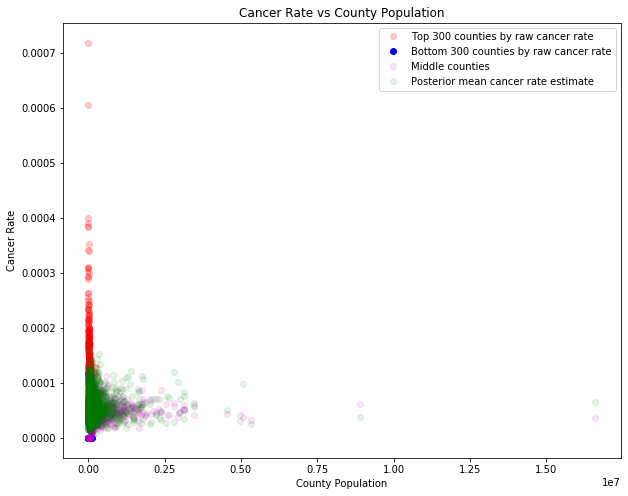

In [9]:
#calculate the posterior mean theta
posterior_mean = np.mean(trace['theta'], axis=0)


plt.figure(figsize=(10,8))
plt.plot(kcancer_df_sorted.loc[:299, 'pop'], kcancer_df_sorted.loc[:299, 'pct_mortality'], 'ro', alpha=0.2, label='Top 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.tail(300).loc[:, 'pop'], kcancer_df_sorted.tail(300).loc[:, 'pct_mortality'], 'bo', alpha=1, label='Bottom 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.loc[300:2812, 'pop'], kcancer_df_sorted.loc[300:2812, 'pct_mortality'], 'mo', alpha=0.1, label='Middle counties')
plt.plot(kcancer_df_sorted.loc[:, 'pop'], 5*posterior_mean, 'go', alpha=0.1, label='Posterior mean cancer rate estimate')
plt.title("Cancer Rate vs County Population")
plt.xlabel("County Population")
plt.ylabel("Cancer Rate")
plt.legend()


To make the patterns more visible, below we are plotting the cancer rate estimates for counties with population up to 10000.

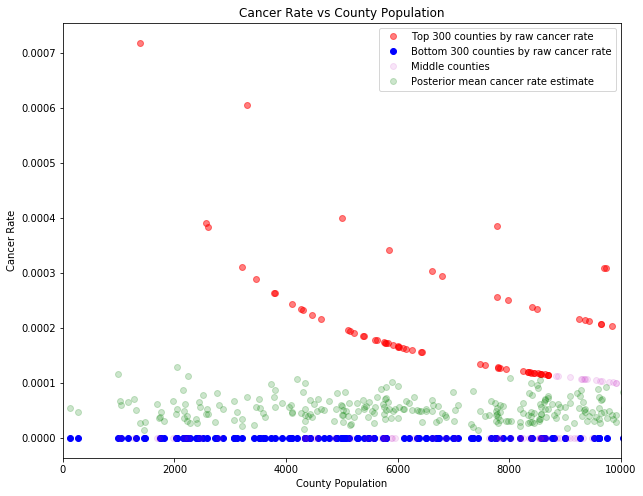

In [10]:
plt.figure(figsize=(10,8))
plt.plot(kcancer_df_sorted.loc[:299, 'pop'], kcancer_df_sorted.loc[:299, 'pct_mortality'], 'ro', alpha=0.5, label='Top 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.tail(300).loc[:, 'pop'], kcancer_df_sorted.tail(300).loc[:, 'pct_mortality'], 'bo', alpha=1, label='Bottom 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.loc[300:2812, 'pop'], kcancer_df_sorted.loc[300:2812, 'pct_mortality'], 'mo', alpha=0.1, label='Middle counties')
plt.plot(kcancer_df_sorted.loc[:, 'pop'], 5*posterior_mean, 'go', alpha=0.2, label='Posterior mean cancer rate estimate')
plt.title("Cancer Rate vs County Population")
plt.xlabel("County Population")
plt.ylabel("Cancer Rate")
#plot the counties with population up to 10000
plt.xlim(0, 0.001*1e7)
plt.legend()

As it was described in question 1, the raw cancer rates are overstated for counties with very low population. Given that the population is very low, the raw cancer rate will be 0 in many cases if no incidents have been recorded or very high even for a small number of kidney cancer incidents. 

To provide an example, consider the case of a small county with population of about 1000 residents. If there is just 1 person with kidney cancer, the raw cancer rate would be 1/1000 which would be one of the highest in the whole country. However, if there was no person with kidney cancer, the rate would be 0, which would be the lowest in the country. As it is made obvious, the raw cancer rate can be very misleading and inconsistent for small sample sizes. 

On the contrary, as we can see from the above plots, the posterior mean estimates for counties with low population are shrunk by the prior to the mean rate over all counties instead of taking extreme values. In scarcity of data, it is more reasonable to believe that the cancer rate would be somewhere close to the population mean rather than overfitting a small sample which results in extreme rate estimates.

## Part II: Hierarchical Bayes
Rather than choosing fixed constants for the hyperparameters $\alpha, \beta$, following the Bayesian philosophy, we typically put additional priors on quantities of which we are uncertain. That is, we model the kidney cancer rates using a ***hierarchical model***:

\begin{aligned}
y_j| \theta_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j | \alpha, \beta &\sim Ga(\alpha, \beta), \quad j = 1, \ldots, N\\
\alpha &\sim Ga(a, b)\\
\beta &\sim Ga(c, d)
\end{aligned}
where $a, b, c, d$ are hyperparameters. 

1.  **(Posterior Marginal Means)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot again, scatter plot the mean of the posterior marginal distribution over $\theta_j$, i.e. $p(\theta_j|y_1, \ldots, y_N)$, vs the county population size, highlight these means in orange. 

  You should use your sampler from the previous homework to obtain these posterior marginal samples.<br><br>

2.  **(Hierarchical Bayes vs Empirical Bayes)** Compare the shrinkage of the posterior marginal means of the hierarchical model to the shrinkage of the posterior means from the Bayesian model with empirical Bayes estimates for $\alpha, \beta$. What is the difference in shrinkage between the full hierarchical model and the Bayesian model with empirical Bayes?

**ANSWERS**

**1.**

In [7]:
#hyperparameters of hierarchical model
a=9
b=6
c=9
d=0.00001


hierarchical_model = pm.Model()
with hierarchical_model:
    #prior on alpha
    alpha = pm.Gamma('alpha', alpha = a, beta = b)
    #prior on beta
    beta = pm.Gamma('beta', alpha = c, beta = d)
    # 3113 priors on theta
    theta = pm.Gamma('theta', alpha = alpha, beta = beta, shape = N)
    #write down the mean of the Poisson
    mu = theta * 5 * n
    #likelihood
    y_obs = pm.Poisson('y', mu=mu, observed=y)

In [8]:
with hierarchical_model:
    trace_hier = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:49<00:00, 80.07draws/s] 
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3bcf8c50>,
      dtype=object)

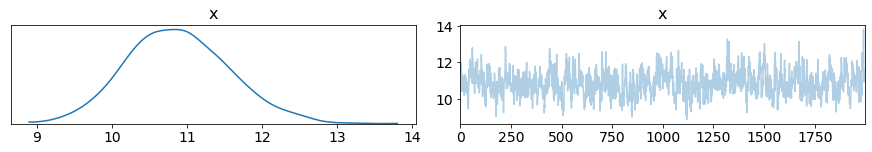

In [9]:
pm.traceplot(trace_hier['alpha'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28dcb8d0>,
      dtype=object)

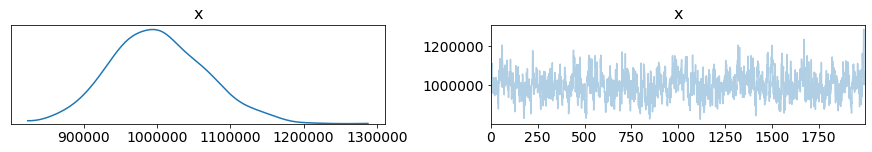

In [10]:
pm.traceplot(trace_hier['beta'])

As we can see from the above trace plots, the sampler has converged since there is no indication os serial correlation. Now we can proceed by plotting the marginal posterior mean cancer rate (multiplied by 5).

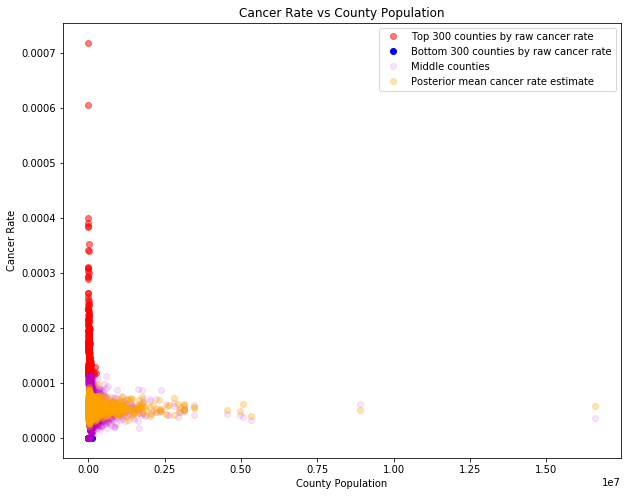

In [14]:
#calculate the posterior mean theta over the last 1000 samples
hier_posterior_mean = np.mean(trace_hier['theta'], axis=0)


plt.figure(figsize=(10,8))
plt.plot(kcancer_df_sorted.loc[:299, 'pop'], kcancer_df_sorted.loc[:299, 'pct_mortality'], 'ro', alpha=0.5, label='Top 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.tail(300).loc[:, 'pop'], kcancer_df_sorted.tail(300).loc[:, 'pct_mortality'], 'bo', alpha=1, label='Bottom 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.loc[300:2812, 'pop'], kcancer_df_sorted.loc[300:2812, 'pct_mortality'], 'mo', alpha=0.1, label='Middle counties')
plt.plot(kcancer_df_sorted.loc[:, 'pop'], 5*hier_posterior_mean, color = 'orange', marker = 'o', alpha=0.3, linestyle = '', label='Posterior mean cancer rate estimate')
plt.title("Cancer Rate vs County Population")
plt.xlabel("County Population")
plt.ylabel("Cancer Rate")
plt.legend()


Below, we are plotting the  mean of marginal posterior of $\theta$ under the hierarchical model as well as the posterior mean of the Empirical Bayes model for counties with low population.

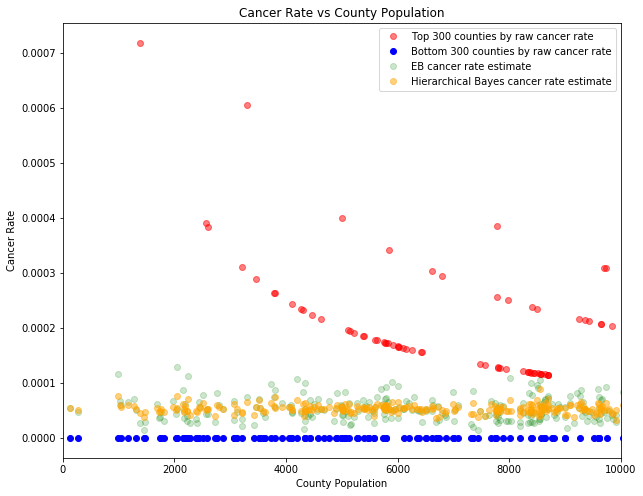

In [15]:
plt.figure(figsize=(10,8))
plt.plot(kcancer_df_sorted.loc[:299, 'pop'], kcancer_df_sorted.loc[:299, 'pct_mortality'], 'ro', alpha=0.5, label='Top 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.tail(300).loc[:, 'pop'], kcancer_df_sorted.tail(300).loc[:, 'pct_mortality'], 'bo', alpha=1, label='Bottom 300 counties by raw cancer rate')
plt.plot(kcancer_df_sorted.loc[:, 'pop'], 5*posterior_mean, 'go', alpha=0.2, label='EB cancer rate estimate')
plt.plot(kcancer_df_sorted.loc[:, 'pop'], 5*hier_posterior_mean, color = 'orange', marker = 'o', alpha=0.5, linestyle = '', label='Hierarchical Bayes cancer rate estimate')
plt.title("Cancer Rate vs County Population")
plt.xlabel("County Population")
plt.ylabel("Cancer Rate")
plt.xlim(0, 0.001*1e7)
plt.legend()


As we can see from the above plots, the amount of shrinkage achieved by the hierarchical model is larger than this achieved by the Empicical Bayes model. Specifically, we can see that for low-population counties, the posterior mean $\theta_j$'s are shrunk to a thinner more concentrated strip of posterior mean values while Empirical Bayes model allows for greater variability. 

Deciding whether more or less shrinkage is desirable in the context of this application depends on our beliefs. For example, we might favor a bit less shrinkage since it might be more realistic that the cancer rate of each county might deviate more or less from the population mean rate depending on special demographic factors and socioeconomic characteristics.